# <p style="text-align: center;"> ROC curve analysis: For Sydney's Children's Hospital </p>


## **IMPORTS**

 Below cell will download the libraries that are required to run the graph!<br>
 You don't need to worry about these, just run them and you're ready to go! :)<br><br>
 **Select the cell below press 'Run' from the above menu or press 'Shift' + 'Enter' to run the code. Then scroll down!**

In [ ]:
# RUN ME !

!pip install plotly
!pip install cufflinks
!pip install matplotlib
!pip install sklearn

import pandas as pd
import numpy as np
import cufflinks as cf
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
from matplotlib import figure
from sklearn.metrics import roc_curve, auc
%matplotlib inline


from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

## **CREATING DATA VALUES**

### So from the lab results, we have seperated scores of people who doesn't have disease and has the disease

In [ ]:
# RUN ME !

df = pd.DataFrame()
df["Doesn't have disease"]=[1,3,5,8,8,9,9,9,14,15,16]
df['Have Disease']=[10,14,15,17,17,18,18,19,20,21,24]

So if we were to say people who doesn't have disease get 0 and people who does have it gets 1.<br>
Our list will look like this ! Which are the true predictions
(This will used to calculate results for the graph)

In [ ]:
# RUN ME !

true_predictions = [0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]

## <p style="text-align: center;"> THE GRAPH </p>


The code below will calculate the TP, TN, FP, FN, Sensitivity, Specificity, Accuracy, Disease prevalnce, PPV and  NPV for the cutoff value chosen by you in the below graph<br>

Like we said before.. <br><br>
You don't need to worry about these, just run them and you're ready to go! <br><br>

Happy learning !

In [ ]:
#RUN ME


@interact
def scatter_plot(GraphColour=list(cf.colors._scales_names.keys()),Cuttoff_Val= np.arange(1,25)):
    
#Calculating TN, FN, TP, FP & predictions (0 or 1) at your given cutoff value 
    tn,fn,tp,fp=0,0,0,0
    pred=[]
    for i in df["Doesn\'t have disease"]:
        if i <= Cuttoff_Val:
            tn=tn+1
            pred.append(0)
        else:
            fn=fn+1
            pred.append(1)    
    for i in df['Have Disease']:
        if i > Cuttoff_Val:
            tp=tp+1
            pred.append(1)
        else:
            fp=fp+1
            pred.append(0)
    
#Account for division by zero and then calculate Sensitivity & Specificity
    if tp <= 0:
        sensitivity = 0
    else:
        sensitivity = tp/(tp+fn)
    
    if tn <= 0:
        speciificity = 0
    else:
        specificity = tn/(fp+tn)
    
#Disease prevalence
    DP = (tp+fn)/(tp+tn+fp+fn)
#Accuracy
    Acc = (tp+tn)/(tp+tn+fp+fn)
#positive predicted value
    PPV = tp/(tp+fp)
#Negative predicted value
    NPV = tn/(fn+tn)
    
  
    #Distribution Plot
    df.iplot(kind='hist',xTitle='Test Score', yTitle='Frequency',histfunc='count', barmode='overlay',opacity=0.75,
             x=df["Doesn't have disease"],y=df['Have Disease'], colorscale=GraphColour,vline= Cuttoff_Val,annotations=
             [dict(x=Cuttoff_Val+3.4,y=7,xref='x',yref='y',text='Sensitivity: '+ str(round(sensitivity*100,2))+
            '% <br>' +'Specificity: '+ str(round(specificity*100,2))+'% <br>' +'Desease Prevalence: '+
            str(round(DP*100,2))+'% <br>' +'PPV: '+ str(round(PPV*100,2))+'% , NPV: '+str(round(NPV*100,2))+'% <br>'+
            'Accuracy: '+ str(round(Acc*100,2))+'%',textangle= 360,showarrow=False,arrowhead=7,ax=0,ay=-40,)])
    
    #ROC curve calculations, plot settings and plotting
    fig_size = plt.rcParams["figure.figsize"]  
    fig_size[0] = 15 
    fig_size[1] = 10 
    plt.rcParams["figure.figsize"] = fig_size  
    fpr, tpr, thresholds = roc_curve(pred,true_predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

## **How to use the Graph?**

Select your favourite color scale for the graph by choosing items from the GraphColour drop down menu <br>
Tip: polar and ggplot has the nicest colours

Select different Cutoffs to seperate the groups by choosing values from the Cuttoff_Val drop down menu, and see how the Sensitivity, Specificity, PPV, NPV and Accuracy changes for that specific Cuttoff of test score

**Other features?**<br><br>
You can press and drag your mouse to zoom, and double click to zoom out!<br><br>
At the top right of the graph, there are options to download the above plot as a 'png' file and more features!<br><br>
Try and see what they all do! If you would like to reset the graph? Just run the code above it.

## **Glossary:**
    
Sensitivity: Probability that a test result will be positive when the disease is present (true positive rate)

Specificity: Probability that a test result will be negative when the disease is not present (true negative rate)

Positive predictive value: Probability that the disease is present when the test is positive. 
= TP / (TP+FP)

Negative predictive value: Probability that the disease is not present when the test is negative. 
= TN  / (FN+TN)

Accuracy: Overall probability that a patient will be correctly classified. 
= (TP+TN) / (TP+TN+FP+FN)

<br>

Note: Results from the graph are shown as percentage

## Note for the instructor to change values in the data (3 steps)

For example:<br><br>
You would like to add test score of '16' to people who doesn't have disease and '24' to people with disease:


**Step 1: Add value of 16 inside the ' [ ] ' for df["Doesn't have disease] = [ ] and 24 inside df["Have Disease"] = [ ] <br>**
**Note:** Make sure that both groups have same total number of samples

**Step 2: Change values for the variable 'true_predictions' according to the values in your groups.**

### Before:

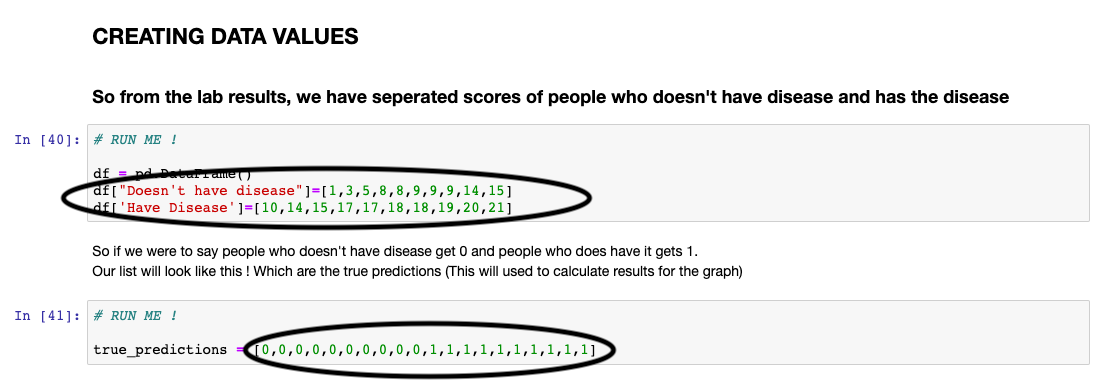

In [1]:
#PLEASE DON'T RUN ME !

from IPython.display import Image
PATH = "/Users/thahaseenakp/Desktop/"
Image(filename = PATH + "Change_data_values-before.png", width=900, height=60)

### After:

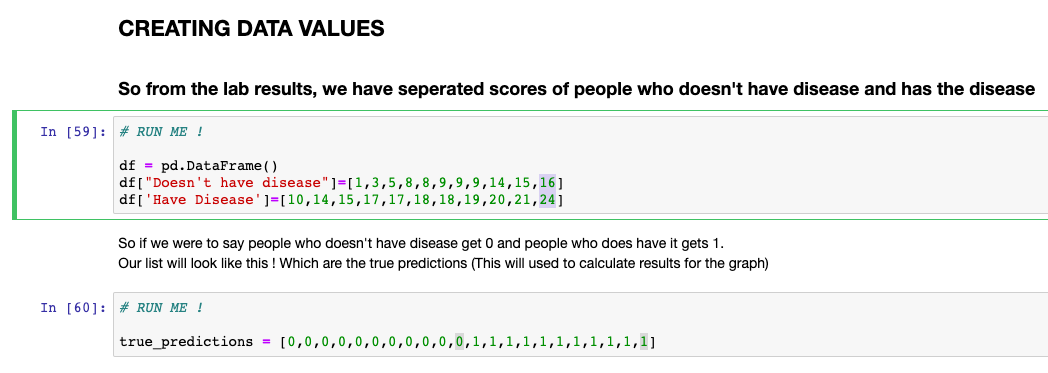

In [2]:
#PLEASE DON'T RUN ME !

from IPython.display import Image
PATH = "/Users/thahaseenakp/Desktop/"
Image(filename = PATH + "Change_data_values-after.png", width=900, height=60)

**Step 3: Change the cutoff value range to choose from 1 to the Max value + 1
For example:**<br><br>
Our max value from both sample is now 24, so (1,25)

### Before:

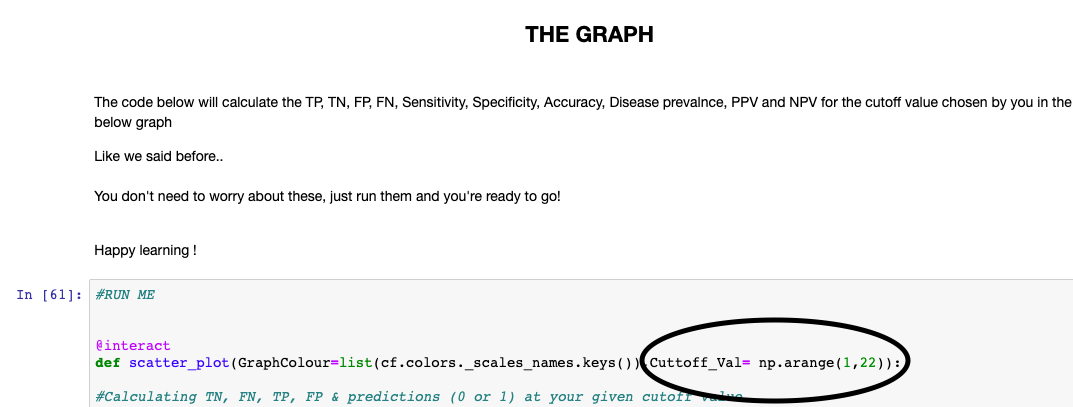

In [3]:
#PLEASE DON'T RUN ME !

from IPython.display import Image
PATH = "/Users/thahaseenakp/Desktop/"
Image(filename = PATH + "Change_cutoff_value-before.png", width=900, height=60)

### After:

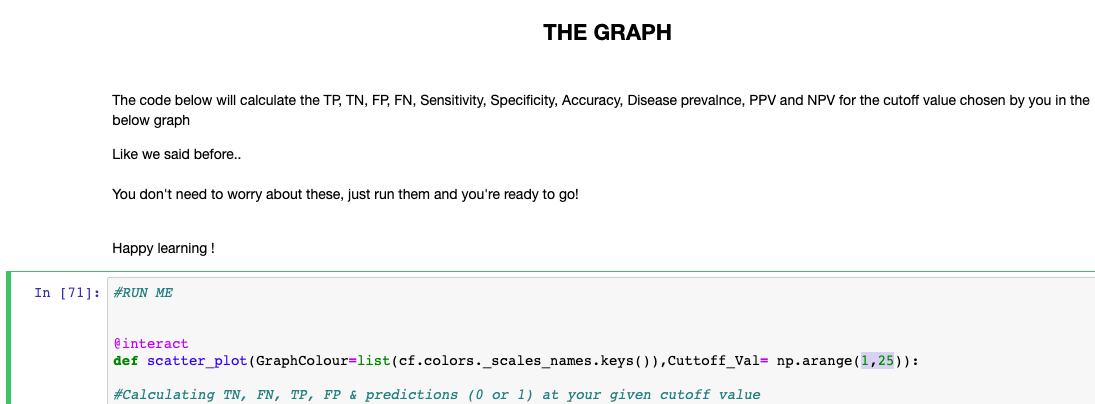

In [4]:
#PLEASE DON'T RUN ME !

from IPython.display import Image
PATH = "/Users/thahaseenakp/Desktop/"
Image(filename = PATH + "Change_cutoff_value-after.png", width=900, height=60)